This notebook is responsible for performing the descriptive analysis.

In [1]:
# Import necessary packages, as well as some formatting of coming graphs. 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from cycler import cycler
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["axes.labelsize"]= 12
plt.rcParams["figure.facecolor"] = "#f2f2f2"
plt.rcParams['savefig.edgecolor'] = "#f2f2f2"
plt.rcParams['savefig.facecolor'] ="#f2f2f2"
plt.rcParams["figure.figsize"] = [16,10]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 14
greens = ['#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
multi =['#66c2a4','#1f78b4','#a6cee3','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
plt.rcParams["axes.prop_cycle"] = cycler(color=multi)

In [2]:
# Read the csv file
df = pd.read_csv('../Data/TrondheimHousingDataCleaned.csv')

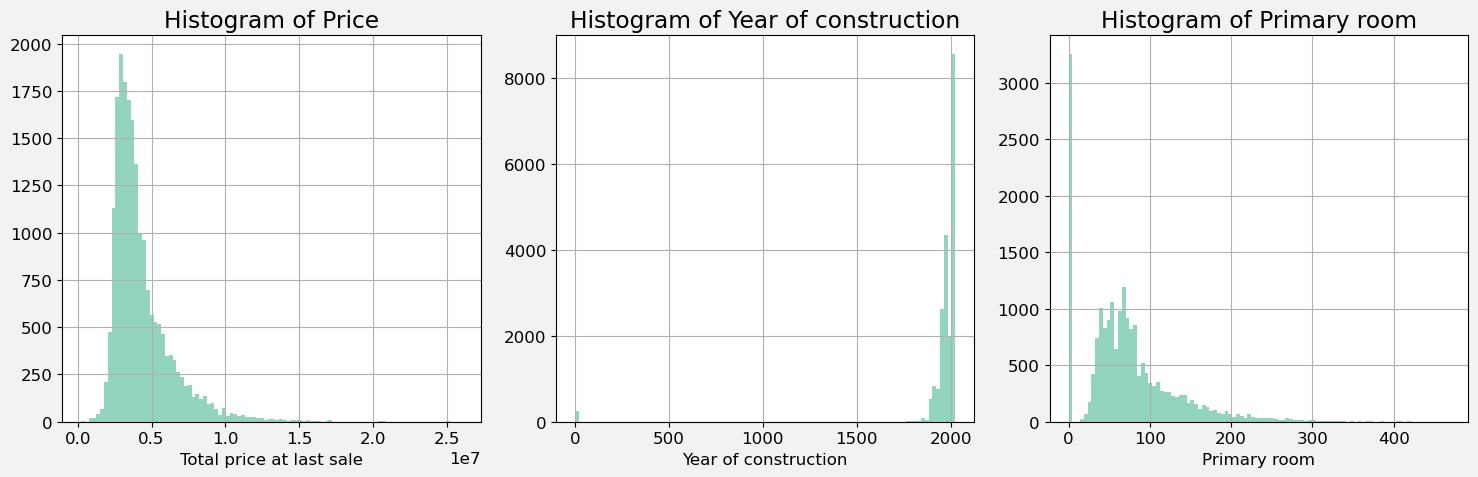

In [7]:
# Histograms of Price, Year of construction and Primary room
hist_var = df[['Total price at last sale', 'Year of construction', 'Primary room']]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Creating histograms for each variable
hist_var['Total price at last sale'].hist(bins=100, alpha=0.7, ax=axes[0])
axes[0].set_title('Histogram of Price')
axes[0].set_xlabel('Total price at last sale')

hist_var['Year of construction'].hist(bins=100, alpha=0.7, ax=axes[1])
axes[1].set_title('Histogram of Year of construction')
axes[1].set_xlabel('Year of construction')

hist_var['Primary room'].hist(bins=100, alpha=0.7, ax=axes[2])
axes[2].set_title('Histogram of Primary room')
axes[2].set_xlabel('Primary room')

plt.tight_layout()
plt.show()


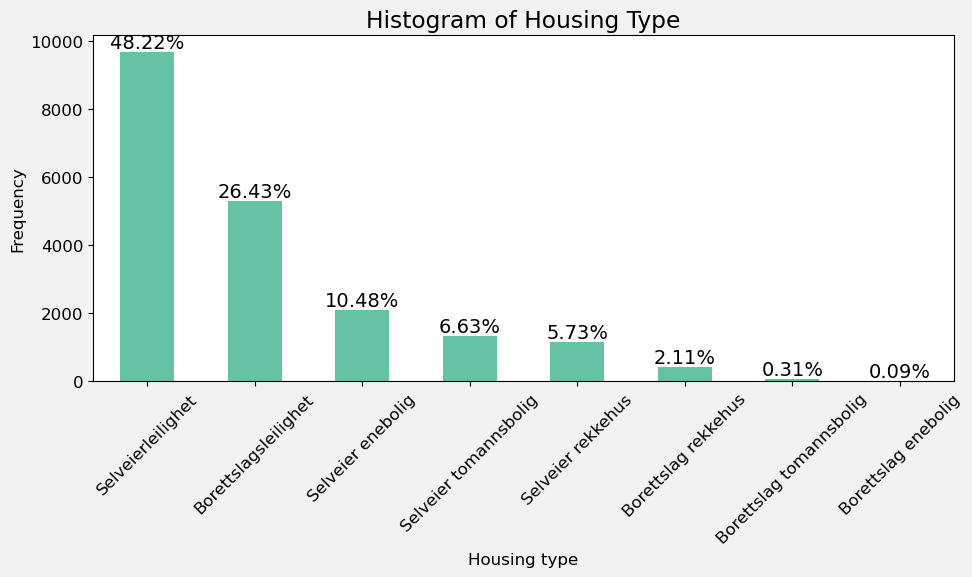

In [13]:
plt.figure(figsize=(10, 6)) 

housing_type_counts = df['Housing type'].value_counts()
total_count = housing_type_counts.sum()

# Plot histogram
housing_type_counts.plot(kind='bar')
plt.title('Histogram of Housing Type')
plt.ylabel('Frequency')

# Rotate x-axis
plt.xticks(rotation=45)

# Calculate and display percentage labels
for i, count in enumerate(housing_type_counts):
    percentage = (count / total_count) * 100
    plt.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout() 
plt.show()


In [8]:
df['Housing type'].value_counts()

Housing type
Selveierleilighet          9685
Borettslagsleilighet       5308
Selveier enebolig          2104
Selveier tomannsbolig      1331
Selveier rekkehus          1150
Borettslag rekkehus         424
Borettslag tomannsbolig      63
Borettslag enebolig          19
Name: count, dtype: int64

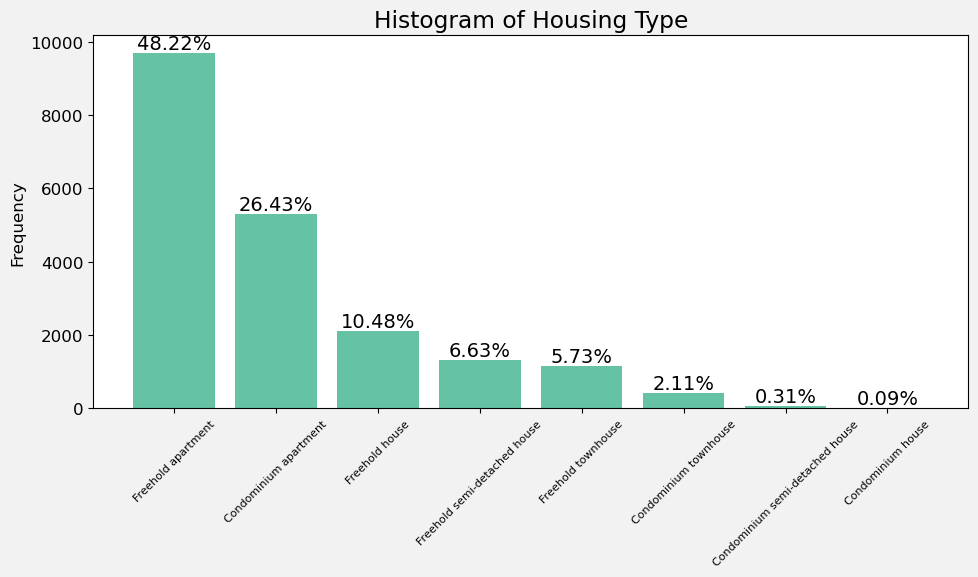

In [14]:
# Here we translate the housing types to English
housing_type_counts = {
    'Selveierleilighet': 9685,
    'Borettslagsleilighet': 5308,
    'Selveier enebolig': 2104,
    'Selveier tomannsbolig': 1331,
    'Selveier rekkehus': 1150,
    'Borettslag rekkehus': 424,
    'Borettslag tomannsbolig': 63,
    'Borettslag enebolig': 19
}

translation_dict = {
    'Selveierleilighet': 'Freehold apartment',
    'Borettslagsleilighet': 'Condominium apartment',
    'Selveier enebolig': 'Freehold house',
    'Selveier tomannsbolig': 'Freehold semi-detached house',
    'Selveier rekkehus': 'Freehold townhouse',
    'Borettslag rekkehus': 'Condominium townhouse',
    'Borettslag tomannsbolig': 'Condominium semi-detached house',
    'Borettslag enebolig': 'Condominium house'
}

# Translate housing types
translated_housing_types = {translation_dict[key]: value for key, value in housing_type_counts.items()}

# Plot histogram
plt.figure(figsize=(10, 6)) 
plt.bar(translated_housing_types.keys(), translated_housing_types.values())
plt.title('Histogram of Housing Type')
plt.ylabel('Frequency')

plt.xticks(rotation=45, fontsize = 8)

# Percentage labels
total_count = sum(translated_housing_types.values())
for i, count in enumerate(translated_housing_types.values()):
    percentage = (count / total_count) * 100
    plt.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout() 
plt.show()


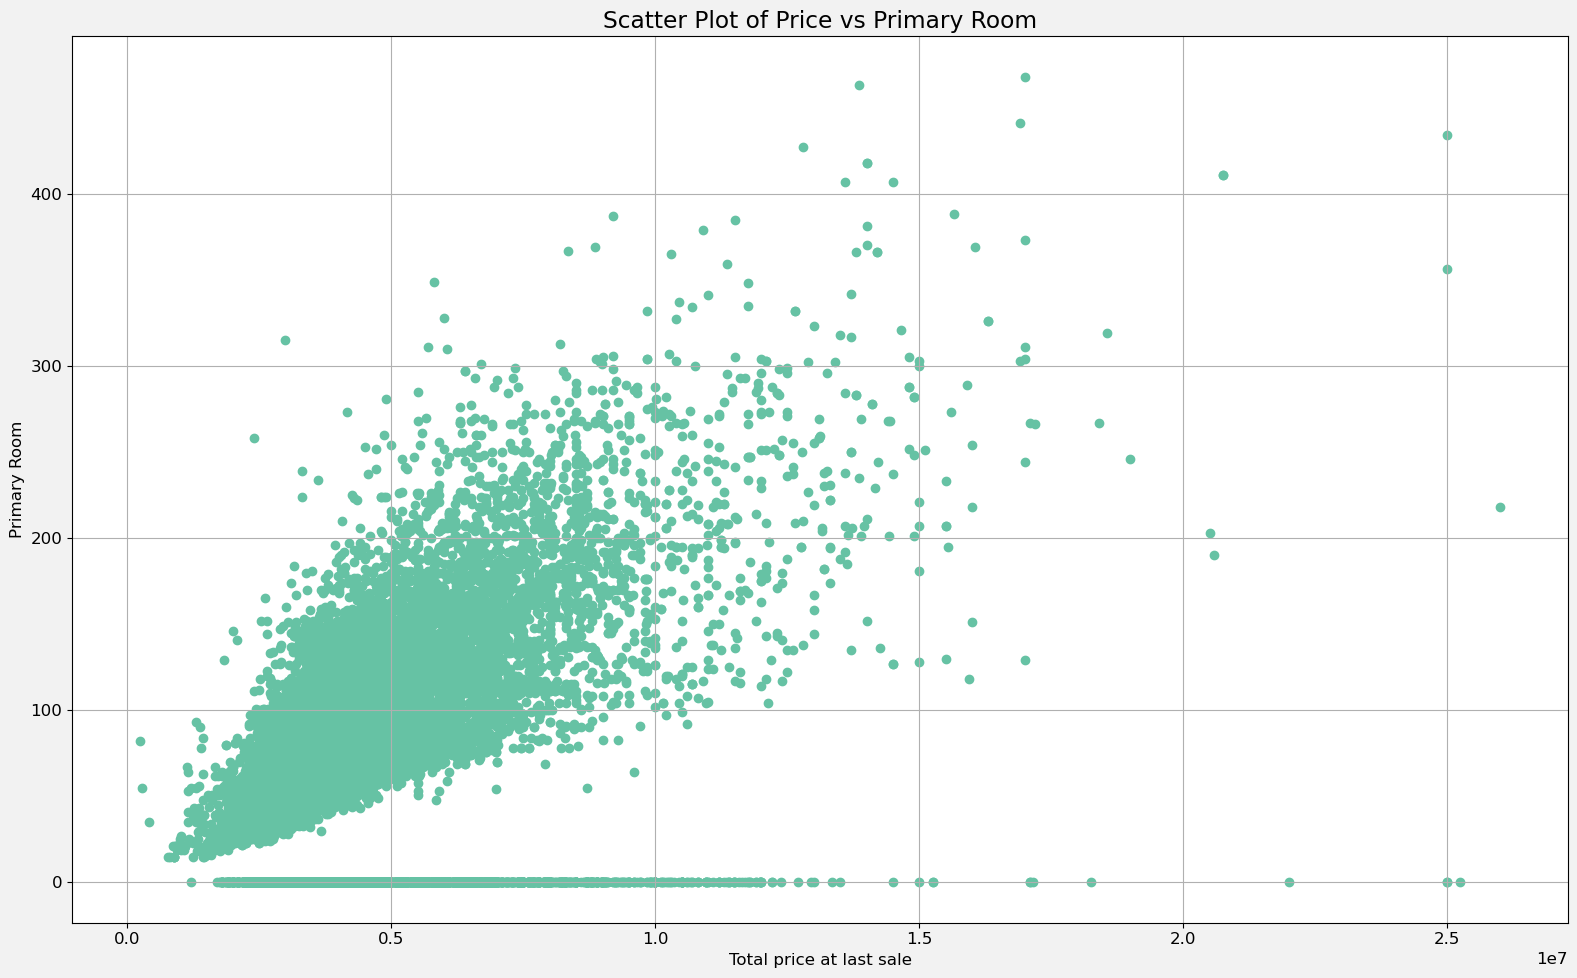

In [8]:
# Price against Primary room
plt.figure(figsize=(16, 10))

# Scatter plot
plt.scatter(df['Total price at last sale'], df['Primary room'])

# Adding labels and title
plt.title('Scatter Plot of Price vs Primary Room')
plt.xlabel('Total price at last sale')
plt.ylabel('Primary Room')

# Show plot
plt.grid(True)  
plt.tight_layout()  
plt.show()


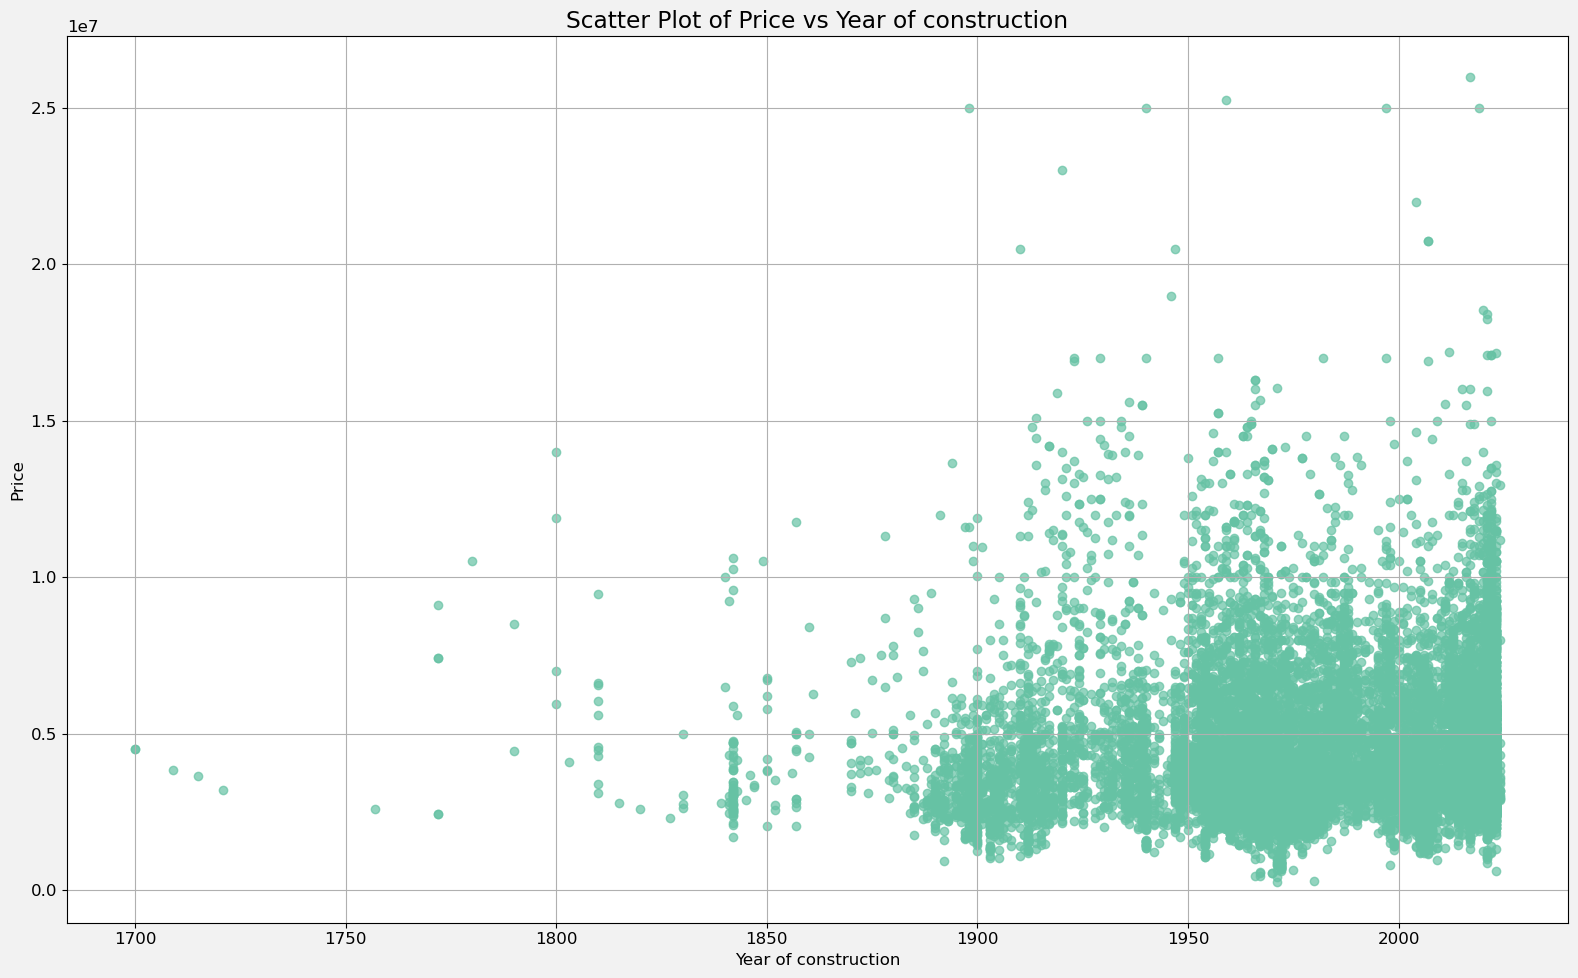

In [103]:
# Price against Year of construction
plt.figure(figsize=(16, 10))

# Scatter plot
plt.scatter(df['Year of construction'],df['Price'], alpha = 0.7)

# Adding labels and title
plt.title('Scatter Plot of Price vs Year of construction')
plt.ylabel('Price')
plt.xlabel('Year of construction')

# Show plot
plt.grid(True) 
plt.tight_layout()  
plt.show()


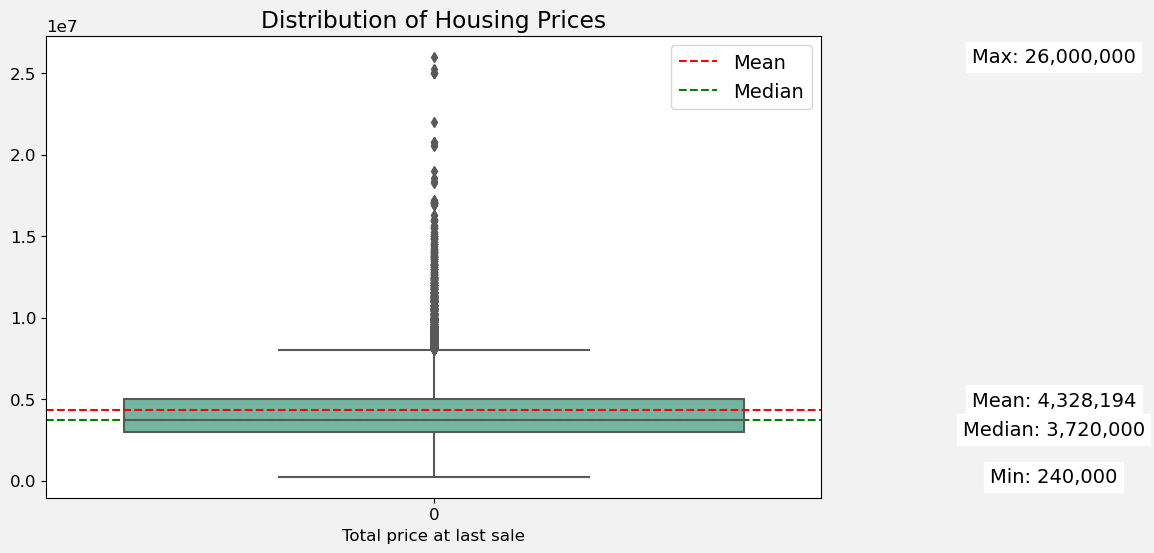

In [9]:
# Boxplot of the distribution of housing prices
plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(data=df['Total price at last sale'])

# Add mean, median, min, and max annotations
plt.axhline(y=df['Total price at last sale'].mean(), color='r', linestyle='--', label='Mean')
plt.axhline(y=df['Total price at last sale'].median(), color='g', linestyle='--', label='Median')
plt.text(0.8, df['Total price at last sale'].mean(), f"Mean: {'{:,.0f}'.format(df['Total price at last sale'].mean())}", va='bottom', ha='center', backgroundcolor='w')
plt.text(0.8, df['Total price at last sale'].median(), f"Median: {'{:,.0f}'.format(df['Total price at last sale'].median())}", va='top', ha='center', backgroundcolor='w')
plt.text(0.8, df['Total price at last sale'].min(), f"Min: {'{:,.0f}'.format(df['Total price at last sale'].min())}", va='center', ha='center', backgroundcolor='w')
plt.text(0.8, df['Total price at last sale'].max(), f"Max: {'{:,.0f}'.format(df['Total price at last sale'].max())}", va='center', ha='center', backgroundcolor='w')

# Add labels and title
plt.title('Distribution of Housing Prices')
plt.xlabel('Total price at last sale')
plt.ylabel('')

plt.legend()
plt.show()

In [10]:
# How many residences under the maximum price for a civil economist.
total_count = len(df)
count_under = df[df['Total price at last sale'] < 5750000]['Total price at last sale'].count()

percentage_under = (count_under / total_count) * 100

print("Percentage of variables under 5,750,000:", f"{percentage_under:.2f}%")


Percentage of variables under 5,750,000: 82.27%


In [11]:
total_count = len(df)
count_under_9m = df[df['Total price at last sale'] < 9000000]['Total price at last sale'].count()

percentage_under_9m = (count_under_9m / total_count) * 100

print("Percentage of variables under 9,000,000:", percentage_under_9m)


Percentage of variables under 9,000,000: 96.40509858593906


In [12]:
# Median price for each postal code
median_prices = df.groupby('Postal code')['Total price at last sale'].median().reset_index()

print("Median Price for Each Postal code:")
median_prices


Median Price for Each Postal code:


,Postal code,Total price at last sale
0,7010,3236025.0
1,7011,2782749.5
2,7012,3400000.0
3,7013,3690000.0
4,7014,3745000.0
...,...,...
69,7097,3631173.0
70,7098,2737247.0
71,7099,3324674.5
72,7540,3790000.0


In [14]:
# Here we sort the prices at descending order
median_prices_sorted = df.groupby('Postal code')['Total price at last sale'].median().reset_index()
median_prices_sorted = median_prices_sorted.sort_values(by='Total price at last sale', ascending=False)
median_prices_sorted.reset_index(drop = True, inplace = True)

print("Median Price for Each Postal Code (Sorted from Highest to Lowest):")
print(median_prices_sorted)


Median Price for Each Postal Code (Sorted from Highest to Lowest):
    Postal code  Total price at last sale
0          7051                 7150000.0
1          7059                 6995000.0
2          7025                 6550000.0
3          7060                 6405000.0
4          7071                 6300000.0
..          ...                       ...
69         7067                 2918172.0
70         7082                 2849406.5
71         7029                 2805723.5
72         7011                 2782749.5
73         7098                 2737247.0

[74 rows x 2 columns]


In the code below we make a heatmap of the frequency and mean price in each postal code.

In [16]:
center_lat = df['Lat'].mean()
center_lon = df['Lon'].mean()
print(center_lat, center_lon)

63.40725988797052 10.411396585839475


In [17]:
# Made a new dataframe to use when plotting heatmap over map
map_df = df[['Lat', 'Lon','Postal code']]
map_df = map_df.drop_duplicates()

In [18]:
# Add frequency to the new dataframe
frequency_df = df.groupby('Postal code').size().reset_index(name='Frequency')
map_df = pd.merge(map_df, frequency_df, on='Postal code', how='left')

In [19]:
# Add mean price in each postal code to the new dataframe
mean_price_df = df.groupby('Postal code')['Total price at last sale'].mean().reset_index()
mean_price_df = mean_price_df.rename(columns={'Total price at last sale': 'Mean Price'})
map_df = pd.merge(map_df, mean_price_df, on='Postal code', how='left')

In [20]:
map_df.head()

,Lat,Lon,Postal code,Frequency,Mean Price
0,63.4239,10.4927,7058,408,4.455753e+06
1,63.4364,10.4134,7042,227,4.705909e+06
2,63.4206,10.3973,7030,543,4.526145e+06
3,63.4044,10.4535,7049,273,4.708337e+06
4,63.3941,10.4113,7037,144,4.670735e+06


In [24]:
import plotly.express as px

# Assuming 'map_df' is your DataFrame containing 'Lat', 'Lon', 'Frequency', and 'Median Price' columns
map_df['Mean Price'] = pd.to_numeric(map_df['Mean Price'], errors='coerce')

fig = px.scatter_mapbox(map_df, lat='Lat', lon='Lon', 
                        color='Mean Price',  # Color according to median price
                        size='Frequency',  # Size according to frequency
                        color_continuous_scale='Inferno',  # Choose a color scale
                        size_max=30,  # Max size of the points
                        zoom=9.75,
                        center=dict(lat=center_lat-0.015, lon=center_lon),
                        mapbox_style='open-street-map',
                        opacity=0.6, 
                        labels={'Mean Price': 'Mean Price', 'Frequency': 'Frequency'},
                        width=800,  
                        height=600)  

fig.show()
